# Aufgabe 04

In [47]:
# Install dependencies
!pip install networkx pygraphviz matplotlib

In [48]:
import os
from typing import Set, Tuple

import networkx as nx
from IPython.display import Image
from networkx.drawing.nx_agraph import to_agraph

# Ensure the assets directory exists
os.makedirs('assets', exist_ok=True)

prefix = "aufgabe_07"

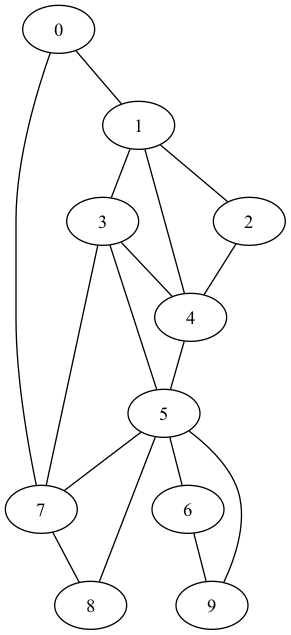

In [49]:
edges = {(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (3, 7), (4, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 8)}
nodes = set(range(0, 8))
g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

a = to_agraph(g)
filename = f"assets/{prefix}_graph.png"
a.draw(filename, format='png', prog='dot')
display(Image(filename))

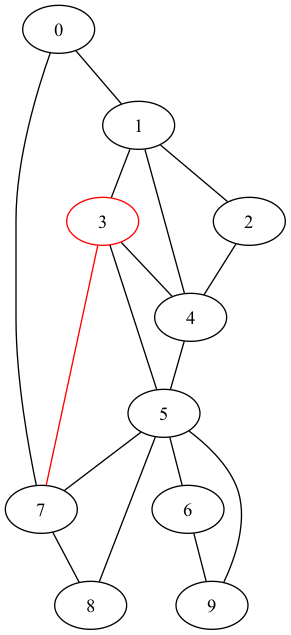

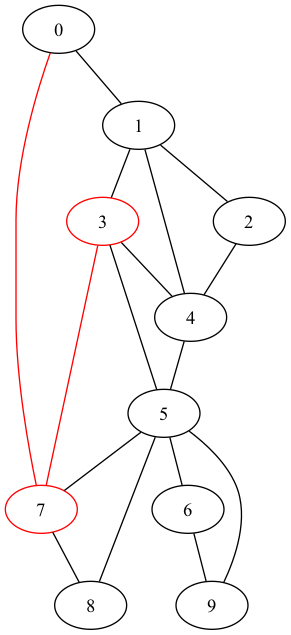

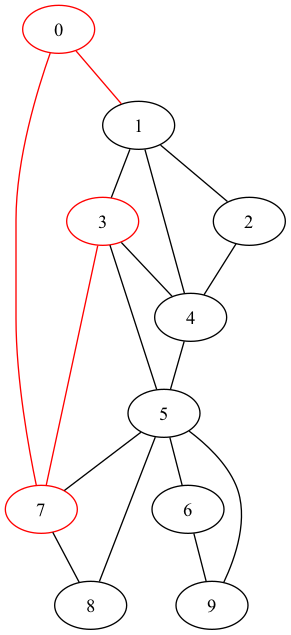

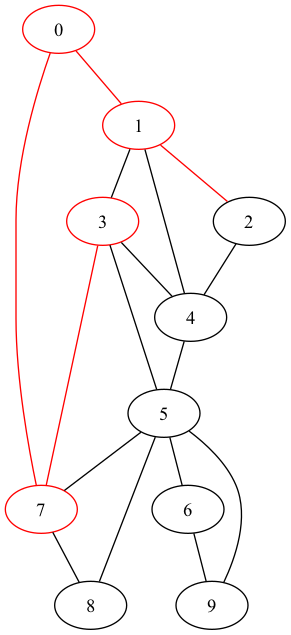

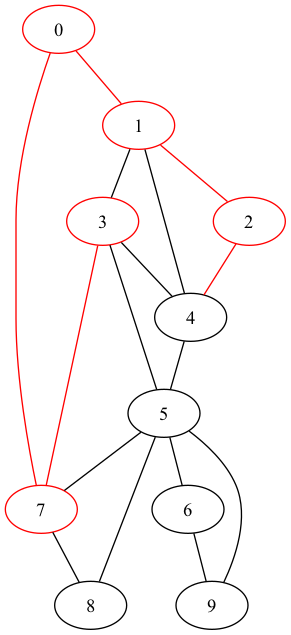

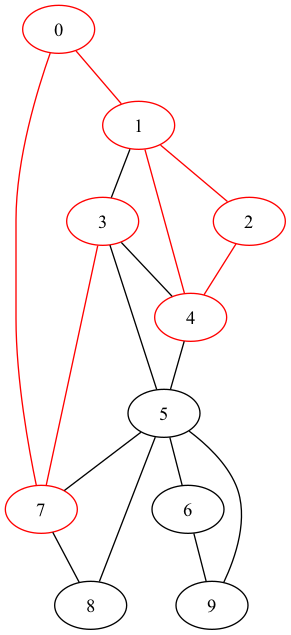

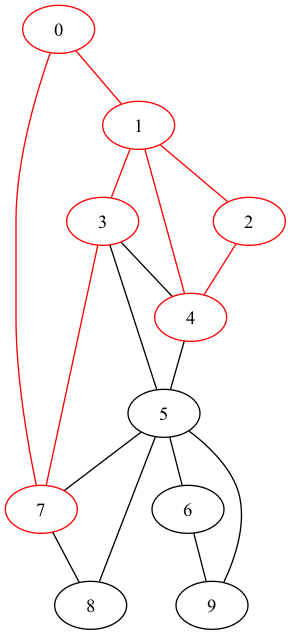

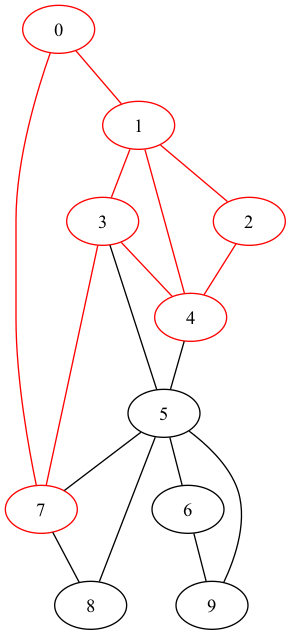

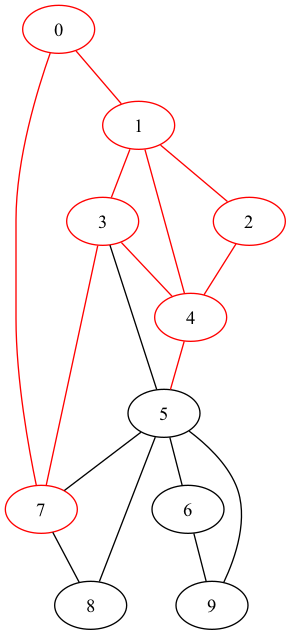

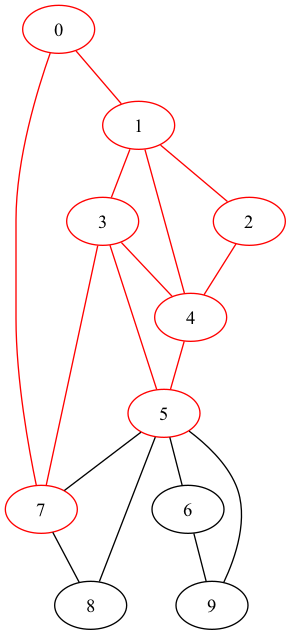

In [52]:
import networkx as nx
from random import choice
from typing import List

def is_bridge(graph: nx.Graph, edge: Tuple[int, int], v: int) -> bool:
    """ 
    This function checks if the edge is a bridge
    Removing the edge and checking if `v` can still reach all nodes
    """
    temp_graph = graph.copy()
    temp_graph.remove_edge(*edge)

    # We perform a DFS to check connectivity
    visited = set()
    stack = [v]
    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            stack.extend(n for n in temp_graph.neighbors(node) if n not in visited)

    # If the number of visited nodes equals the number of nodes in the temp graph, it's not a bridge
    return len(visited) != len(temp_graph.nodes)


def find_next_edge(v, F):
    possible_edges = list(F.edges(v))
    if not possible_edges:
        return None
    for edge in possible_edges:
        if not is_bridge(F, edge, v):
            return edge
    return possible_edges[0]


def draw_step(a, e, v, idx):
    # Visualize Step
    a.get_node(v).attr['color'] = 'red'
    if e:
        a.get_edge(e[0], e[1]).attr['color'] = 'red'
    filename = f"assets/{prefix}_fleury_step_{idx}.png"
    a.draw(filename, format='png', prog='dot')
    display(Image(filename))


def fleury(graph: nx.Graph) -> (List[int], List[str]):
    F = graph.copy()
    v = choice(list(F.nodes))
    K = [v]
    e = choice(list(F.edges(v)))
    a = to_agraph(graph)
    lines = list()

    idx = 0
    while len(F.edges) > 0:
        draw_step(a, e, v, idx)
        lines.append(f"idx {idx} - v {v} - F {list(F.edges)} - e {e} - K {K}")
        F.remove_edge(*e)
        v = e[0] if v == e[1] else e[1]
        K.append(v)
        if len(F.edges) > 0:
            e = find_next_edge(v, F)
            if e is None:
                break  # Exit if no edges are found
        idx += 1

    return K, lines

p, l = fleury(g)


In [54]:
print(p)
for line in l:
    print(line)

[3, 7, 0, 1, 2, 4, 1, 3, 4, 5, 3]
idx 0 - v 3 - F [(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 7), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (3, 7) - K [3]
idx 1 - v 7 - F [(0, 1), (0, 7), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (7, 0) - K [3, 7]
idx 2 - v 0 - F [(0, 1), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (0, 1) - K [3, 7, 0]
idx 3 - v 1 - F [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (1, 2) - K [3, 7, 0, 1]
idx 4 - v 2 - F [(1, 3), (1, 4), (2, 4), (3, 4), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (2, 4) - K [3, 7, 0, 1, 2]
idx 5 - v 4 - F [(1, 3), (1, 4), (3, 4), (3, 5), (4, 5), (5, 7), (5, 8), (5, 6), (5, 9), (6, 9), (7, 8)] - e (4, 1) - K [3, 7, 0, 1, 2, 4]
idx 6 - v 1 - F [(1, 3), (3, 4), (3, 5), (4, 5), (5, 7), 

In [55]:
len(p)

11